# ECON5350 - Machine Learning Classification

* Instructor: David Guo
* Spring, 2024


Agenda:

1) a quick review on term group project, find you group partner, jumpstate the project 
2) classification, on discrete DV such as binary result (Yes/No) `vs` regression (on continous DV)

<!-- # Installing Latest PyCaret

* https://github.com/pycaret/pycaret -->

Parametric Modeling Method

y = a _ b1X1 + b2X2 + ...

# This section will be helpful for your term project. 

# Imports packages

In [1]:
!pip install missingno -q

In [2]:
# importing the required libraries
import pandas as pd
import numpy as np
import pickle, os, sys
# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import missingno as ms

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

import sklearn
# import pycaret #used for model selection

In [4]:
# # check version
# from pycaret.utils import version
# version()

# Import Data

In [4]:
# Reading a .csv file by creating a dataframe using pandas
# Reading the datasets
df = pd.read_csv('../Week12/Traffic Violaions.csv', encoding = "utf-8", on_bad_lines='skip')

In [5]:
print(df.shape)
df.head()

(52966, 15)


,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


# Data Preprocessing & EDA

In [6]:
df.isnull().sum()

stop_date                 0
stop_time                 1
country_name          52966
driver_gender          3386
driver_age_raw         3378
driver_age             3620
driver_race            3385
violation_raw          3385
violation              3385
search_conducted          1
search_type           50881
stop_outcome           3385
is_arrested            3385
stop_duration          3385
drugs_related_stop        1
dtype: int64

# .copy() create a copy of df to a new df without messing up the original df

In [7]:
df1 = df.copy() #deep=True is default change to df1 has NO impact on df

In [6]:
#df1 = df.copy(deep=False)

In [8]:
df.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [9]:
df.country_name.dtype

dtype('float64')

In [10]:
df1.country_name = [str(i)+"_missing" for i in df1.country_name]

In [11]:
df1.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,nan_missing,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,nan_missing,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,nan_missing,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,nan_missing,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,nan_missing,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [12]:
df1.drop(columns = ['country_name','search_type','driver_age_raw'], inplace=True)
df1.dropna(subset = ['driver_gender'], inplace = True)

In [12]:
# df1 = df.copy(deep=True)
# df1.driver_gender.value_counts(dropna=False)

In [13]:
#df1.isna().sum()
df1.isnull().sum() #leave the missing age there

stop_date               0
stop_time               0
driver_gender           0
driver_age            240
driver_race             0
violation_raw           0
violation               0
search_conducted        0
stop_outcome            0
is_arrested             0
stop_duration           0
drugs_related_stop      0
dtype: int64

In [14]:
df1.shape

(49580, 12)

In [15]:
pickle.dump(df1, open("tmp.pkl", "wb"))

In [16]:
df1 = pickle.load(open("tmp.pkl", "rb"))

* 1. Some missing values are to remain in the driver_age column. We have to fill these missing values using median, OR you can try KNN we used in regression modeling **
* 2. After cleaning, we again have to check the remaining missing values.**

# Data Manipulation:

In [17]:
data = df1.copy(deep=True)
pd.to_datetime(data['stop_time'])

0       2024-04-17 01:55:00
1       2024-04-17 08:15:00
2       2024-04-17 23:15:00
3       2024-04-17 17:15:00
4       2024-04-17 10:00:00
                ...        
52956   2024-04-17 22:22:00
52958   2024-04-17 22:36:00
52959   2024-04-17 23:25:00
52962   2024-04-17 06:43:00
52964   2024-04-17 07:19:00
Name: stop_time, Length: 49580, dtype: datetime64[ns]

In [18]:
data['stop_hour'] = pd.to_datetime(data['stop_time'], format = '%H:%M').dt.hour

# check every column datatype

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49580 entries, 0 to 52964
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           49580 non-null  object 
 1   stop_time           49580 non-null  object 
 2   driver_gender       49580 non-null  object 
 3   driver_age          49340 non-null  float64
 4   driver_race         49580 non-null  object 
 5   violation_raw       49580 non-null  object 
 6   violation           49580 non-null  object 
 7   search_conducted    49580 non-null  object 
 8   stop_outcome        49580 non-null  object 
 9   is_arrested         49580 non-null  object 
 10  stop_duration       49580 non-null  object 
 11  drugs_related_stop  49580 non-null  object 
 12  stop_hour           49580 non-null  int32  
dtypes: float64(1), int32(1), object(11)
memory usage: 5.1+ MB


In [20]:
int("1:55".split(":")[0])

1

In [21]:
data.head()

,stop_date,stop_time,driver_gender,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_hour
0,1/2/2005,1:55,M,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1
1,1/18/2005,8:15,M,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,8
2,1/23/2005,23:15,M,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,23
3,2/20/2005,17:15,M,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False,17
4,3/14/2005,10:00,F,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,10


In [22]:
data.stop_hour[:5]

0     1
1     8
2    23
3    17
4    10
Name: stop_hour, dtype: int32

In [23]:
data['stop_duration'].value_counts()

stop_duration
0-15 Min     37432
16-30 Min     9845
30+ Min       2303
Name: count, dtype: int64

# you do not need to build a 1-hot matrix of stop_duration

In [24]:
data['stop_duration'] = data['stop_duration'].map({'0-15 Min':7.5,'16-30 Min':23,'30+ Min':45})

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49580 entries, 0 to 52964
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           49580 non-null  object 
 1   stop_time           49580 non-null  object 
 2   driver_gender       49580 non-null  object 
 3   driver_age          49340 non-null  float64
 4   driver_race         49580 non-null  object 
 5   violation_raw       49580 non-null  object 
 6   violation           49580 non-null  object 
 7   search_conducted    49580 non-null  object 
 8   stop_outcome        49580 non-null  object 
 9   is_arrested         49580 non-null  object 
 10  stop_duration       49580 non-null  float64
 11  drugs_related_stop  49580 non-null  object 
 12  stop_hour           49580 non-null  int32  
dtypes: float64(2), int32(1), object(10)
memory usage: 5.1+ MB


In [26]:
data.driver_race.value_counts()

driver_race
White       37363
Black        6594
Hispanic     4099
Asian        1375
Other         149
Name: count, dtype: int64

In [27]:
stop_duration_based_on_race = data.groupby('driver_race')[['stop_duration']].mean()
stop_duration_based_on_race

,stop_duration
driver_race,
Asian,11.384000
Black,13.817865
Hispanic,14.295682
Other,10.708054
White,11.879359


In [28]:
#data.search_conducted = data.search_conducted.replace(to_replace=[True, False], value=[1, 0])

In [29]:
data.search_conducted = data.search_conducted.astype(int)

In [30]:
data.search_conducted.value_counts()

search_conducted
0    47495
1     2085
Name: count, dtype: int64

In [31]:
data.drugs_related_stop = data.drugs_related_stop.replace(to_replace=[True, False], value=[1, 0])

In [32]:
data['stop_date'].dtype

dtype('O')

In [33]:
data['stop_date'] = pd.to_datetime(data['stop_date'])
data['stop_date'].dtype

dtype('<M8[ns]')

In [34]:
data['stop_date'][0]

Timestamp('2005-01-02 00:00:00')

In [35]:
data['stop_Year'] = pd.DatetimeIndex(data['stop_date']).year

In [36]:
data['stop_Year'] = data['stop_date'].dt.year

In [37]:
data.head()

,stop_date,stop_time,driver_gender,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_hour,stop_Year
0,2005-01-02,1:55,M,20.0,White,Speeding,Speeding,0,Citation,False,7.5,0,1,2005
1,2005-01-18,8:15,M,40.0,White,Speeding,Speeding,0,Citation,False,7.5,0,8,2005
2,2005-01-23,23:15,M,33.0,White,Speeding,Speeding,0,Citation,False,7.5,0,23,2005
3,2005-02-20,17:15,M,19.0,White,Call for Service,Other,0,Arrest Driver,True,23.0,0,17,2005
4,2005-03-14,10:00,F,21.0,White,Speeding,Speeding,0,Citation,False,7.5,0,10,2005


# add a spelling check function to your jupyter lab

In [38]:
pip install jupyterlab-spellchecker -q

Note: you may need to restart the kernel to use updated packages.


# spelling checker is annoying

In [39]:
pip uninstall jupyterlab-spellchecker -q -y

Note: you may need to restart the kernel to use updated packages.


# my dog name is dada.

In [40]:
data.violation.value_counts()

violation
Speeding               32138
Moving violation        8385
Equipment               4276
Other                   2961
Registration/plates     1820
Name: count, dtype: int64

# get distribution of `stop_year`

In [41]:
yearly_data = data.groupby('stop_Year').size()

In [42]:
yearly_data.head()

stop_Year
2005     2505
2006    10141
2007     8905
2008     8151
2009     7237
dtype: int64

In [43]:
type(yearly_data)

pandas.core.series.Series

In [44]:
search_conducted = len(data[data.search_conducted == 1])
search_conducted

2085

In [45]:
data.is_arrested.value_counts(dropna=True)

is_arrested
False    47711
True      1869
Name: count, dtype: int64

In [46]:
data.is_arrested.value_counts(dropna=False)

is_arrested
False    47711
True      1869
Name: count, dtype: int64

In [47]:
arrested_after_search = len(data[(data.search_conducted == 1) & (data.is_arrested is True)])
arrested = ((arrested_after_search/search_conducted)*100)
not_arrested = (100-(arrested))

In [48]:
not_arrested

100.0

In [49]:
data.groupby(['violation_raw', 	'is_arrested']).size()

violation_raw                     is_arrested
APB                               False             26
                                  True              17
Call for Service                  False            519
                                  True             154
Equipment/Inspection Violation    False           3914
                                  True             362
Motorist Assist/Courtesy          False            111
                                  True               8
Other Traffic Violation           False           7829
                                  True             556
Registration Violation            False           1572
                                  True             248
Special Detail/Directed Patrol    False           1944
                                  True              10
Speeding                          False          31649
                                  True             489
Suspicious Person                 False             19
                   

# So far , we are doing feature engineeringto create a set of IV

# Age Distribution *

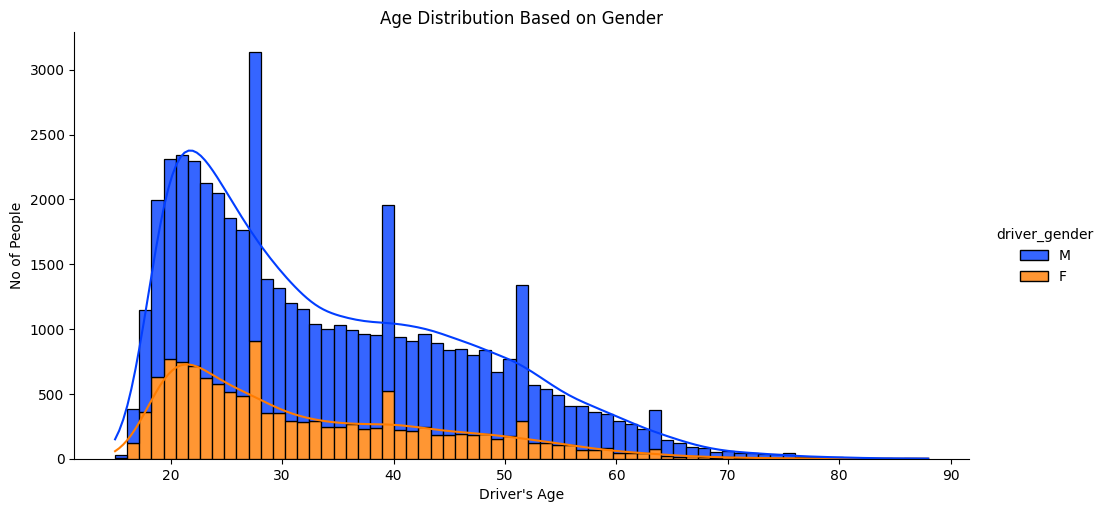

In [50]:
sns.displot(x = 'driver_age', hue = 'driver_gender', kde = True, data = data, 
            multiple = 'stack', alpha = 0.8, palette = "bright", height=5, aspect=2)
plt.title('Age Distribution Based on Gender')
plt.xlabel("Driver's Age")
plt.ylabel("No of People");

# Distribution in Violation Type *

Text(0, 0.5, 'No. of People Involved')

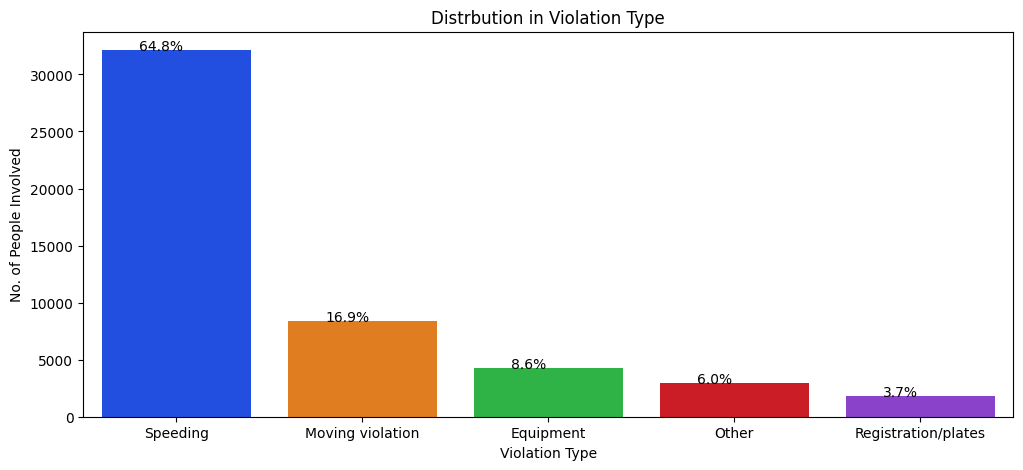

In [51]:
fig , ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(x = data.violation, data = data, order = data.violation.value_counts().index, palette = "bright")
for i in ax.patches:
    percentage = '{:.1f}%'.format(100*i.get_height()/len(data.violation))
    x = i.get_x()+i.get_width()-0.6
    y = i.get_height()
    ax.annotate(percentage, (x, y), )
plt.title("Distrbution in Violation Type")
plt.xlabel("Violation Type")
plt.ylabel("No. of People Involved")

# Hours in Which Speed Violated**
  

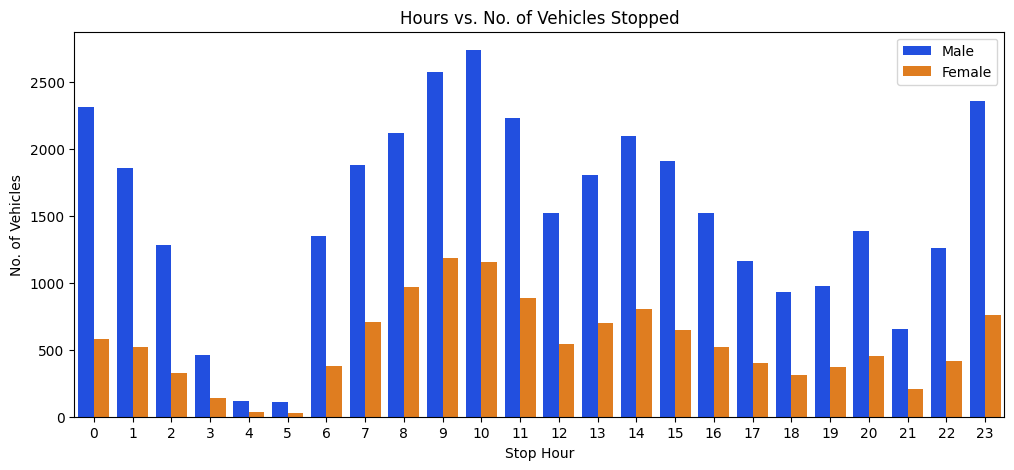

In [52]:
plt.figure(figsize = (12,5))
sns.countplot(x = data.stop_hour,data = data,hue = 'driver_gender', palette = "bright")
plt.title('Hours vs. No. of Vehicles Stopped')
plt.legend(['Male','Female'])
plt.xlabel("Stop Hour")
plt.ylabel("No. of Vehicles");

**Traffic Violation Distribution Based on Race**


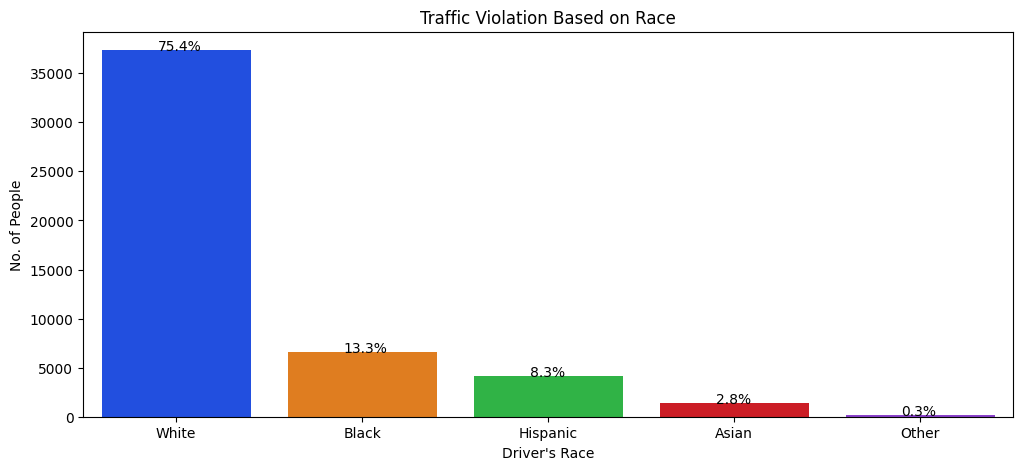

In [53]:
fig , ax = plt.subplots(figsize = (12,5))
ax = sns.countplot(x=data.driver_race, data=data, order = data.driver_race.value_counts().index,
                   linewidth = 0, palette = "bright")
for i in ax.patches:
    percentage = '{:.1f}%'.format(100*i.get_height()/len(data.driver_race))
    x = i.get_x() + i.get_width() - 0.5
    y = i.get_height()
    ax.annotate(percentage, (x, y))
plt.title('Traffic Violation Based on Race')
plt.xlabel("Driver's Race")
plt.ylabel("No. of People");

# Fit Logistics Regression 

- soft outcome: probabilities
- hard outcome: 0/1

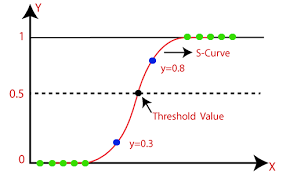

In [54]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [55]:
data['stop_time'].dtype

dtype('O')

In [56]:
data.head()

,stop_date,stop_time,driver_gender,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_hour,stop_Year
0,2005-01-02,1:55,M,20.0,White,Speeding,Speeding,0,Citation,False,7.5,0,1,2005
1,2005-01-18,8:15,M,40.0,White,Speeding,Speeding,0,Citation,False,7.5,0,8,2005
2,2005-01-23,23:15,M,33.0,White,Speeding,Speeding,0,Citation,False,7.5,0,23,2005
3,2005-02-20,17:15,M,19.0,White,Call for Service,Other,0,Arrest Driver,True,23.0,0,17,2005
4,2005-03-14,10:00,F,21.0,White,Speeding,Speeding,0,Citation,False,7.5,0,10,2005


In [57]:
data['stop_time'] = [float(i.replace(":", ".")) for i in data['stop_time']]

In [58]:
data['stop_time'][:5].dtype

dtype('float64')

In [59]:
data.head()

,stop_date,stop_time,driver_gender,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_hour,stop_Year
0,2005-01-02,1.55,M,20.0,White,Speeding,Speeding,0,Citation,False,7.5,0,1,2005
1,2005-01-18,8.15,M,40.0,White,Speeding,Speeding,0,Citation,False,7.5,0,8,2005
2,2005-01-23,23.15,M,33.0,White,Speeding,Speeding,0,Citation,False,7.5,0,23,2005
3,2005-02-20,17.15,M,19.0,White,Call for Service,Other,0,Arrest Driver,True,23.0,0,17,2005
4,2005-03-14,10.00,F,21.0,White,Speeding,Speeding,0,Citation,False,7.5,0,10,2005


In [60]:
data = data.drop(['violation_raw', 'stop_outcome', 'stop_date'], axis = 1)

In [61]:
data.head()

,stop_time,driver_gender,driver_age,driver_race,violation,search_conducted,is_arrested,stop_duration,drugs_related_stop,stop_hour,stop_Year
0,1.55,M,20.0,White,Speeding,0,False,7.5,0,1,2005
1,8.15,M,40.0,White,Speeding,0,False,7.5,0,8,2005
2,23.15,M,33.0,White,Speeding,0,False,7.5,0,23,2005
3,17.15,M,19.0,White,Other,0,True,23.0,0,17,2005
4,10.00,F,21.0,White,Speeding,0,False,7.5,0,10,2005


## one-hot transformation on 'driver_gender', 'driver_race', 'violation'

In [62]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse_output=False)

cat_col = ['driver_gender','driver_race','violation']

In [63]:
a = {"col_0":["a", "b", "c"], "col_1":[1, 2, 3]}

In [64]:
a_df = pd.DataFrame(a)

In [65]:
a_df

,col_0,col_1
0,a,1
1,b,2
2,c,3


In [ ]:
a_df['col_o_a'] = [1, 0, 0]
a_df['col_o_b'] = [0, 1, 0]
a_df['col_o_c'] = [0, 0, 1]

In [66]:
a_df = a_df.drop("col_0", axis = 1)
a_df

,col_1
0,1
1,2
2,3


In [68]:
data_cat_1hot = cat_encoder.fit_transform(data[['driver_gender','driver_race','violation']])
data_cat_1hot.shape

(49580, 12)

In [50]:
type(data_cat_1hot)

numpy.ndarray

# STOP here on April 10th

# New `sklearn.preprocessing` allow you to 1hot encode and return pandas df instead of numpy array, check your sklearn version

In [70]:
cat_encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
data_cat_1hot = cat_encoder.fit_transform(data[['driver_gender','driver_race','violation']])

In [76]:
data_cat_1hot.head()

,driver_gender_F,driver_gender_M,driver_race_Asian,driver_race_Black,driver_race_Hispanic,driver_race_Other,driver_race_White,violation_Equipment,violation_Moving_violation,violation_Other,violation_Registration/plates,violation_Speeding
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [73]:
data_cat_1hot.columns

Index(['driver_gender_F', 'driver_gender_M', 'driver_race_Asian',
       'driver_race_Black', 'driver_race_Hispanic', 'driver_race_Other',
       'driver_race_White', 'violation_Equipment',
       'violation_Moving violation', 'violation_Other',
       'violation_Registration/plates', 'violation_Speeding'],
      dtype='object')

In [75]:
#remove space in colume names
data_cat_1hot.columns = [i.replace(" ", "_") for i in data_cat_1hot.columns]

In [77]:
data_cat_1hot.shape

(49580, 12)

# How to merge 8 columnss and 12 column df?

In [86]:
dada_new = pd.concat([data.loc[:, [i for i in data.columns if i not in ['driver_gender','driver_race','violation']]], data_cat_1hot], axis = 1)

In [87]:
data.loc[:, [i for i in data.columns if i not in ['driver_gender','driver_race','violation']]].shape #8 left columns other than 3 catergorical columns, that is right!

(49580, 8)

In [88]:
dada_new = pd.concat([data.loc[:, [i for i in data.columns if i not in ['driver_gender','driver_race','violation']]], data_cat_1hot], axis = 1)

In [89]:
dada_new.isnull().sum()

stop_time                          0
driver_age                       240
search_conducted                   0
is_arrested                        0
stop_duration                      0
drugs_related_stop                 0
stop_hour                          0
stop_Year                          0
driver_gender_F                    0
driver_gender_M                    0
driver_race_Asian                  0
driver_race_Black                  0
driver_race_Hispanic               0
driver_race_Other                  0
driver_race_White                  0
violation_Equipment                0
violation_Moving_violation         0
violation_Other                    0
violation_Registration/plates      0
violation_Speeding                 0
dtype: int64

In [90]:
# drop the missing age rows
dada_new = dada_new[dada_new.driver_age.isnull() == False]

In [91]:
X = dada_new.drop('is_arrested', axis = 1)
y = np.where(dada_new.is_arrested, 1, 0)

In [92]:
X.shape

(49340, 19)

Our feature engineering efforts are still going on.

# Scaled data is necessary for ML model, Why?

* https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/
  
Scaling facilitates meaningful comparisons between features, improves model convergence, and prevents certain features from overshadowing others based solely on their magnitude

In [96]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler # (X-mean)/std

In [97]:
num_pipeline = Pipeline([
        #('imputer', SimpleImputer(strategy="median")),       
        ('std_scaler', StandardScaler().set_output(transform="pandas")) #same as 1hot tramformation
        ])

In [98]:
X = pd.DataFrame(num_pipeline.fit_transform(X))

In [99]:
X.head()

,stop_time,driver_age,search_conducted,stop_duration,drugs_related_stop,stop_hour,stop_Year,driver_gender_F,driver_gender_M,driver_race_Asian,driver_race_Black,driver_race_Hispanic,driver_race_Other,driver_race_White,violation_Equipment,violation_Moving_violation,violation_Other,violation_Registration/plates,violation_Speeding
0,-1.585381,-1.109800,-0.209948,-0.508134,-0.089949,-1.627829,-1.696158,-0.597639,0.597639,-0.168996,-0.391315,-0.300002,-0.054851,0.57139,-0.307762,-0.450885,-0.247964,-0.195535,0.734159
1,-0.572961,0.456359,-0.209948,-0.508134,-0.089949,-0.552872,-1.696158,-0.597639,0.597639,-0.168996,-0.391315,-0.300002,-0.054851,0.57139,-0.307762,-0.450885,-0.247964,-0.195535,0.734159
2,1.727994,-0.091797,-0.209948,-0.508134,-0.089949,1.750607,-1.696158,-0.597639,0.597639,-0.168996,-0.391315,-0.300002,-0.054851,0.57139,-0.307762,-0.450885,-0.247964,-0.195535,0.734159
3,0.807612,-1.188108,-0.209948,1.126551,-0.089949,0.829215,-1.696158,-0.597639,0.597639,-0.168996,-0.391315,-0.300002,-0.054851,0.57139,-0.307762,-0.450885,4.032843,-0.195535,-1.362103
4,-0.289176,-1.031492,-0.209948,-0.508134,-0.089949,-0.245742,-1.696158,1.673251,-1.673251,-0.168996,-0.391315,-0.300002,-0.054851,0.57139,-0.307762,-0.450885,-0.247964,-0.195535,0.734159


In [100]:
X.stop_time.mean()

-1.5553022995964902e-16

In [101]:
# Cehck the variance
np.var(X.stop_time)

1.0

# Splite data for training and testing

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y) 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [104]:
y_train.shape

(39472,)

In [105]:
lr_pred = logreg.predict(X_test)

In [106]:
lr_pred[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [107]:
lr_prob = logreg.predict_proba(X_test)

In [108]:
lr_prob[:100]

array([[0.98482485, 0.01517515],
       [0.99662552, 0.00337448],
       [0.99036211, 0.00963789],
       [0.98805923, 0.01194077],
       [0.98802126, 0.01197874],
       [0.99667682, 0.00332318],
       [0.95064233, 0.04935767],
       [0.95508511, 0.04491489],
       [0.98514382, 0.01485618],
       [0.99233913, 0.00766087],
       [0.99612771, 0.00387229],
       [0.98475657, 0.01524343],
       [0.99180159, 0.00819841],
       [0.98809851, 0.01190149],
       [0.99157165, 0.00842835],
       [0.98861788, 0.01138212],
       [0.96080685, 0.03919315],
       [0.9847712 , 0.0152288 ],
       [0.96793331, 0.03206669],
       [0.99021564, 0.00978436],
       [0.9730658 , 0.0269342 ],
       [0.99127843, 0.00872157],
       [0.99064704, 0.00935296],
       [0.99098361, 0.00901639],
       [0.65708497, 0.34291503],
       [0.98423442, 0.01576558],
       [0.98526857, 0.01473143],
       [0.99558571, 0.00441429],
       [0.99220228, 0.00779772],
       [0.99607482, 0.00392518],
       [0.

In [109]:
from sklearn import metrics

In [110]:
lr_cm = metrics.confusion_matrix(y_test, lr_pred)
lr_cm

array([[9411,   83],
       [ 290,   84]], dtype=int64)

In [111]:
pd.Series(y_test).value_counts()

0    9494
1     374
Name: count, dtype: int64

<Axes: >

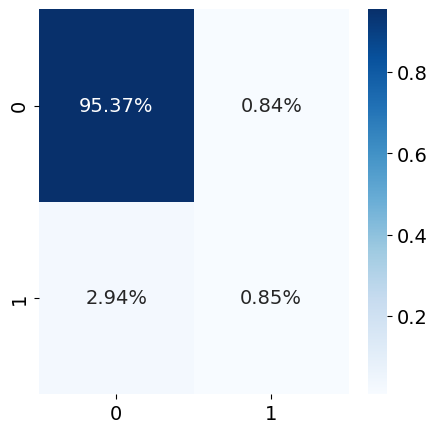

In [112]:
fig, ax = plt.subplots(figsize=(5,5))  
sns.heatmap(lr_cm/np.sum(lr_cm), annot=True, fmt='.2%', cmap='Blues')

In [113]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import precision_recall_curve

In [114]:
def perfMatrix(obs, pred):
    print('Precision: %.3f' % precision_score(obs, pred))
    print('Recall: %.3f' % recall_score(obs, pred))    
    print('F1_score: %.3f' % f1_score(obs, pred))    

In [115]:
perfMatrix(y_test, lr_pred)

Precision: 0.503
Recall: 0.225
F1_score: 0.311


 Let us start the ML modeling practive

# Random Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [117]:
#sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, 
#  criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
# max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, 
# oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)[source]¶

In [118]:
pos_wt =sum(y_train == 0) /sum(y_train == 1)

In [125]:
#create calss weight dict, you had better!
class_weight={0: 1, 1: pos_wt}
class_weight

{0: 1, 1: 25.420348058902277}

## Random Forest Regressor

In [120]:
%%time

#clf = RandomForestClassifier(max_depth=6, random_state=0, class_weight = "balanced", n_estimators=1000)
rf_clf = RandomForestClassifier(max_depth=6, random_state=0, class_weight = class_weight, n_estimators=1000)

rf_clf.fit(X_train, y_train)

CPU times: total: 6.91 s
Wall time: 7.51 s


RandomForestClassifier(class_weight={0: 1, 1: 25.420348058902277}, max_depth=6,
                       n_estimators=1000, random_state=0)

In [121]:
rf_pred = rf_clf.predict(X_test)

In [122]:
rf_cm = metrics.confusion_matrix(y_test, rf_pred)
rf_cm

array([[8165, 1329],
       [  60,  314]], dtype=int64)

<Axes: >

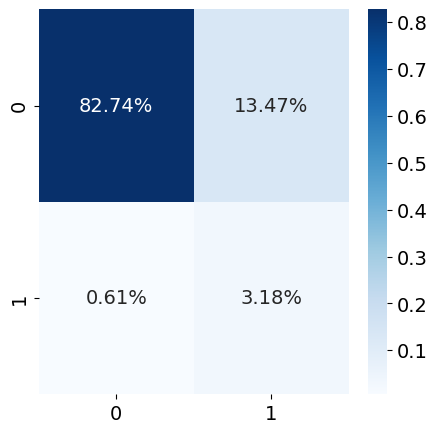

In [123]:
fig, ax = plt.subplots(figsize=(5,5))  
sns.heatmap(rf_cm/np.sum(rf_cm), annot=True, fmt='.2%', cmap='Blues')

In [124]:
perfMatrix(y_test, rf_pred) #high recall at the cost of low precision

Precision: 0.191
Recall: 0.840
F1_score: 0.311


# CatBoost

In [126]:
try:
    import catboost as cb
except:
    !pip install catboost -q
    import catboost as cb

In [127]:
import catboost as cb
from catboost import CatBoostClassifier
from sklearn.utils.class_weight import compute_class_weight

In [128]:
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
cb_class_weights = dict(zip(classes, weights))

In [129]:
cb_clf = CatBoostClassifier(loss_function= "Logloss", class_weights=cb_class_weights, silent = True)
cb_clf.fit(X_train, y_train)

In [130]:
cb_pred = cb_clf.predict(X_test)

In [131]:
cb_cm = metrics.confusion_matrix(y_test, cb_pred)
cb_cm

array([[8674,  820],
       [  94,  280]], dtype=int64)

<Axes: >

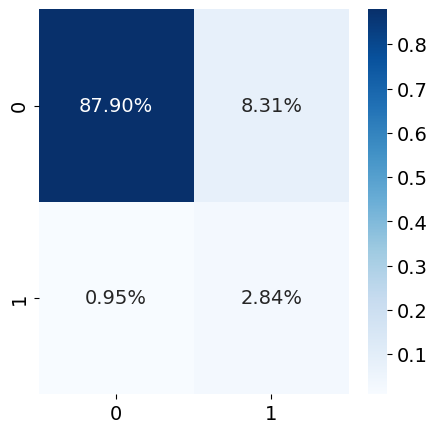

In [132]:
fig, ax = plt.subplots(figsize=(5,5))  
sns.heatmap(cb_cm/np.sum(cb_cm), annot=True, fmt='.2%', cmap='Blues') #much better!

In [133]:
perfMatrix(y_test, cb_pred)

Precision: 0.255
Recall: 0.749
F1_score: 0.380


In [134]:
cb_clf.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'Logloss',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'random_score_type': 'NormalWithModelSizeDecrease',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'class_names': [0, 1],
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'class_weights': [0.5196692943572998, 13.21017360687256],
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees

# Let us fine-tune hyper-parameters of the best model so far by OPTUNA 

* search over a set of predefined parameters by randomized search
* https://optuna.org/

In [137]:
try:
    import optuna
except:
    !pip install optuna -q
    import optuna

In [145]:
from optuna.integration import CatBoostPruningCallback
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [146]:
cb_class_weights

{0: 0.5196692822160198, 1: 13.210174029451139}

In [147]:
get_all_params()

NameError: name 'get_all_params' is not defined

# what CB parameters to be optimized?

* https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier

In [163]:
def objective(trial: optuna.Trial) -> float:
    
    global cb_class_weights
    
    train_x, valid_x, train_y, valid_y = train_test_split(X_train, y_train, test_size=0.2)
    
    param = {        
        "depth": trial.suggest_int("depth", 4, 8), #how deep the the decision tree should go, not deeper the better
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
        'l2_leaf_reg':trial.suggest_int('l2_leaf_reg', 10, 100),
        #"boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        #"bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),        
        #"eval_metric": "Accuracy",
        "objective": "Logloss",
        "class_weights":cb_class_weights,
        }

    #if param["bootstrap_type"] == "Bayesian":
    #    param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    #elif param["bootstrap_type"] == "Bernoulli":
    #    param["subsample"] = trial.suggest_float("subsample", 0.1, 1, log=True)

    cbm = cb.CatBoostClassifier(**param)

    pruning_callback = CatBoostPruningCallback(trial, "Accuracy")
    cbm.fit(
        train_x,
        train_y,
        #eval_set=[(valid_x, valid_y)],
        verbose=False,
        early_stopping_rounds=100,
        #callbacks=[pruning_callback],        
    )

    # evoke pruning manually.
    #pruning_callback.check_pruned()

    preds = cbm.predict(valid_x)
    pred_labels = np.rint(preds)
    accuracy = f1_score(valid_y, pred_labels) #let us stick with the f1-score for performance matrix

    return accuracy


In [164]:
import catboost

In [165]:
study = optuna.create_study(pruner=optuna.pruners.MedianPruner(n_warmup_steps=5), direction="maximize")
study.optimize(objective, n_trials=40, timeout=600)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2024-04-17 21:26:26,057] A new study created in memory with name: no-name-ac11aee0-3e12-47be-9b26-f25ef62ba1bb
[I 2024-04-17 21:26:29,222] Trial 0 finished with value: 0.34393939393939393 and parameters: {'depth': 4, 'learning_rate': 0.0953675644694176, 'l2_leaf_reg': 77}. Best is trial 0 with value: 0.34393939393939393.
[I 2024-04-17 21:26:33,728] Trial 1 finished with value: 0.38130155820348305 and parameters: {'depth': 7, 'learning_rate': 0.08209464440314425, 'l2_leaf_reg': 43}. Best is trial 1 with value: 0.38130155820348305.
[I 2024-04-17 21:26:37,173] Trial 2 finished with value: 0.35257410296411856 and parameters: {'depth': 5, 'learning_rate': 0.05912432800975878, 'l2_leaf_reg': 75}. Best is trial 1 with value: 0.38130155820348305.
[I 2024-04-17 21:26:40,366] Trial 3 finished with value: 0.33105335157318744 and parameters: {'depth': 4, 'learning_rate': 0.04201976260507619, 'l2_leaf_reg': 75}. Best is trial 1 with value: 0.38130155820348305.
[I 2024-04-17 21:26:44,866] Trial 4

Number of finished trials: 40
Best trial:
  Value: 0.4410143329658214
  Params: 
    depth: 8
    learning_rate: 0.0871575686513639
    l2_leaf_reg: 24


In [166]:
print('best_value:', study.best_value)

best_value: 0.4410143329658214


In [167]:
%%time 

cb_optuna = cb.CatBoostClassifier(**study.best_params, silent = True)
cb_optuna.fit(X_train, y_train)

CPU times: total: 4.19 s
Wall time: 6.16 s


In [168]:
cb_optuna_pred = cb_optuna.predict(X_test)

In [169]:
perfMatrix(y_test, cb_optuna_pred)

Precision: 0.542
Recall: 0.259
F1_score: 0.351


In [170]:
cb_cm_ = metrics.confusion_matrix(y_test, cb_optuna_pred)
cb_cm_

array([[9412,   82],
       [ 277,   97]], dtype=int64)

<Axes: >

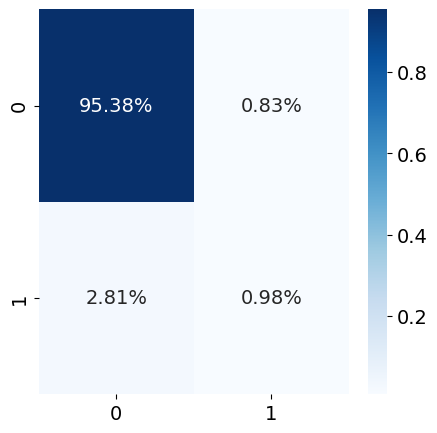

In [171]:
fig, ax = plt.subplots(figsize=(5,5))  
sns.heatmap(cb_cm_/np.sum(cb_cm_), annot=True, fmt='.2%', cmap='Blues')

# One more try on artificial neural network classification method - MLP 

* https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [172]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(random_state=1, max_iter=1000).fit(X_train, y_train)

In [173]:
mlp_pred = mlp_clf.predict(X_test)

In [174]:
perfMatrix(y_test, mlp_pred)

Precision: 0.485
Recall: 0.222
F1_score: 0.305


In [175]:
mlp_cm = metrics.confusion_matrix(y_test, mlp_pred)
mlp_cm

array([[9406,   88],
       [ 291,   83]], dtype=int64)

# get ensembled prediction

In [176]:
cb_prob = cb_optuna.predict_proba(X_test)[:,1]
rf_prob = rf_clf.predict_proba(X_test)[:,1]
mlp_prob = mlp_clf.predict_proba(X_test)[:,1]

In [177]:
ensemble_prob = (cb_prob + rf_prob + mlp_prob)/3

In [178]:
ensemble_pred = np.where(ensemble_prob > 0.5, 1, 0) 

In [179]:
ensemble_cm = metrics.confusion_matrix(y_test, ensemble_pred)
ensemble_cm

array([[9347,  147],
       [ 236,  138]], dtype=int64)

<Axes: >

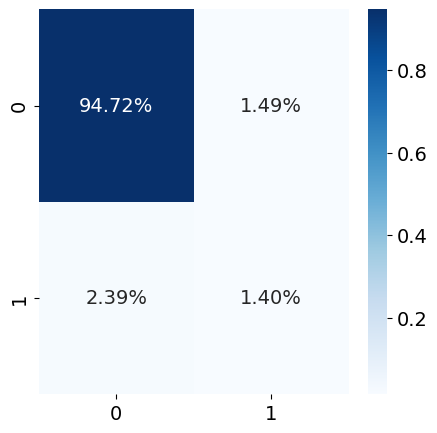

In [180]:
fig, ax = plt.subplots(figsize=(5,5))  
sns.heatmap(ensemble_cm/np.sum(ensemble_cm), annot=True, fmt='.2%', cmap='Blues')

In [181]:
perfMatrix(y_test, ensemble_pred)

Precision: 0.484
Recall: 0.369
F1_score: 0.419
